# PCA

## Introduction
Principal Component Analysis (PCA) is an unsupervised learning technique used primarily for dimensionality reduction. In datasets with a large number of features, PCA helps to simplify data by transforming it into a smaller set of new variables, called principal components, which retain the maximum possible variance in the data. Each principal component is a linear combination of the original features and is designed to be uncorrelated with the others. By reducing the number of dimensions, PCA can improve the interpretability of the data, enhance computational efficiency, and even help with noise reduction. PCA is widely used in fields such as image compression, exploratory data analysis, and feature extraction.

## 1. Data

In [6]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

heart_disease = fetch_ucirepo(id=45)
data = heart_disease.data.features

print("Dataset Metadata:")
print(heart_disease.metadata)
print("\nFirst few rows of the data:")
print(data.head())

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print("\nData has been scaled and is ready for PCA.")


Dataset Metadata:
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi

## 2. Application

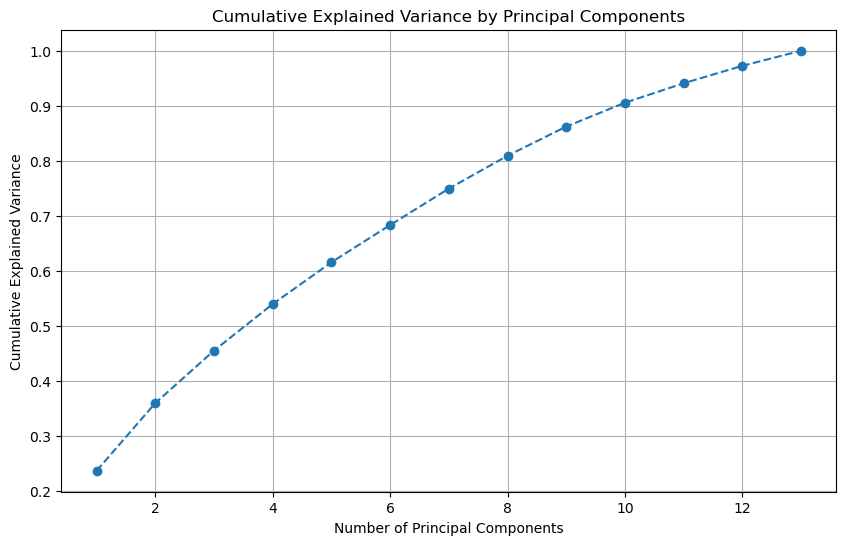

Explained variance ratios for each component:
Principal Component 1: 0.2367
Principal Component 2: 0.1230
Principal Component 3: 0.0954
Principal Component 4: 0.0846
Principal Component 5: 0.0759
Principal Component 6: 0.0677
Principal Component 7: 0.0662
Principal Component 8: 0.0598
Principal Component 9: 0.0530
Principal Component 10: 0.0434
Principal Component 11: 0.0353
Principal Component 12: 0.0317
Principal Component 13: 0.0274


In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(data)

data_scaled = scaler.fit_transform(data_imputed)

# Apply PCA
pca = PCA()
pca.fit(data_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

print("Explained variance ratios for each component:")
for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {var:.4f}")



## 3. Visualization

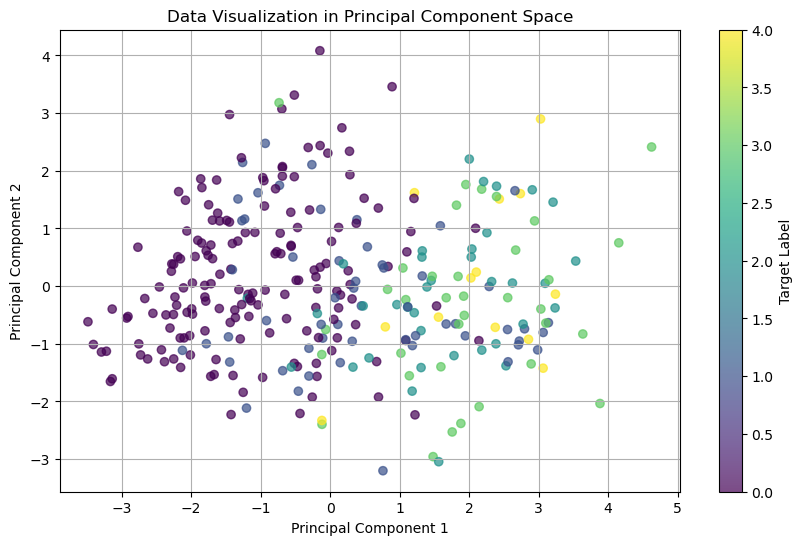

In [18]:
X_pca = pca.transform(data_scaled)

pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df['Target'] = heart_disease.data.targets  

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Target'], cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Target Label")
plt.title("Data Visualization in Principal Component Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## 4. Evaluation

In [23]:
# Increase the number of principal components (e.g., 10)
n_components = 10  # Adjust as needed
X_pca_reduced = pca_df.iloc[:, :n_components]

# Split the reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, pca_df['Target'], test_size=0.2, random_state=42)

# Train a Logistic Regression model on the reduced dataset
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy with {n_components} PCA components: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Classification Accuracy with 10 PCA components: 0.5410

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.43      0.25      0.32        12
           2       0.25      0.22      0.24         9
           3       0.09      0.14      0.11         7
           4       1.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.51      0.31      0.30        61
weighted avg       0.56      0.54      0.51        61

